In [68]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

import itertools

## Creating data to view and fit

In [2]:
n_samples = 1000
# Create circles
X, Y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': Y})

In [6]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


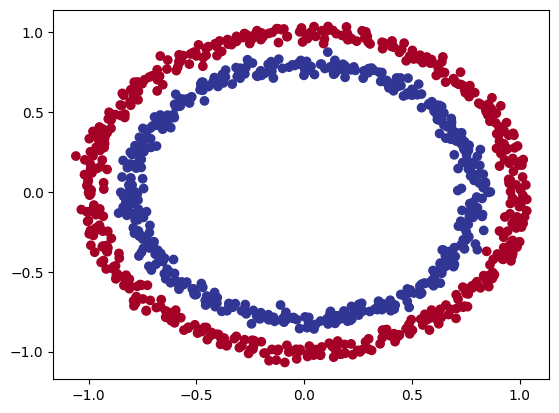

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [8]:
X.shape, Y.shape

((1000, 2), (1000,))

## Modelling

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, Y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 3.0792 - accuracy: 0.4920
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7314 - accuracy: 0.5090
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7061 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5030
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4950


In [10]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, Y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, Y)   

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [11]:
# Try adding another layer
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, Y, epochs=100, verbose=0)

In [12]:
# Evaluate the model
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving the model

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [14]:
# 3. Fit the model
model_3.fit(X, Y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.5475 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2024 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.6171 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0518 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8686 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8272 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8113 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7975 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4750
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5430
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5160
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5180
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4760
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4920
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4830
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4870
Epoch 93/100


We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

    🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

    Takes in a trained model, features (X) and labels (y).
    Creates a meshgrid of the different X values.
    Makes predictions across the meshgrid.
    Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

    🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.


In [15]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
 # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
    y_pred = model.predict(x_in)

  # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 923us/step
doing binary classifcation...


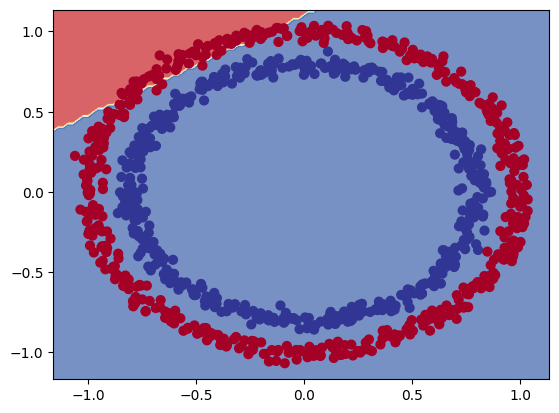

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, Y)

## Trying on a regression problem

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [18]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 354.4900 - mae: 354.4900
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 215.9376 - mae: 215.9376
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 85.8740 - mae: 85.8740
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 68.5355 - mae: 68.5355
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 85.4360 - mae: 85.4360
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 56.6530 - mae: 56.6530
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 46.5820 - mae: 46.5820
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 44.6924 - mae: 44.6924
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 44.8406 - mae: 44.8406
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 43.3226 - mae: 43.3226
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 2ms/step - loss: 38.5561 - mae: 38.5561
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3023 - mae: 38.3023
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5749 - mae: 38.5749
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 38.2530 - mae: 38.2530
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 37.9421 - mae: 37.9421
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 38.4779 - mae: 38.4779
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 38.8703 - mae: 38.8703
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 38.2143 - mae: 38.2143
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 37.9560 - mae: 37.9560
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3719 - mae: 38.3719
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

In [19]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

2/2 [==============================] - 0s 4ms/step


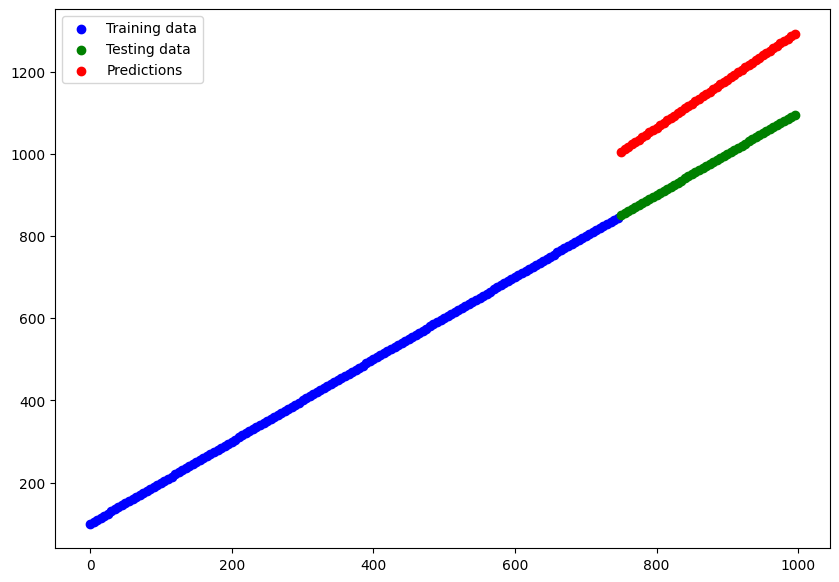

In [20]:
# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

## The missing piece: Non-linearity

In [21]:
tf.random.set_seed(42)

In [22]:
# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.3011 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2031 - accuracy: 0.4600
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1802 - accuracy: 0.4650
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1760 - accuracy: 0.4650
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1724 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1608 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1428 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0736 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0199 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9660 - accuracy: 0.4650
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.7799 - accuracy: 0.4700
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7776 - accuracy: 0.4710
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7754 - accuracy: 0.4710
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7734 - accuracy: 0.4710
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7713 - accuracy: 0.4710
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7693 - accuracy: 0.4710
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7675 - accuracy: 0.4710
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7656 - accuracy: 0.4710
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7637 - accuracy: 0.4710
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7619 - accuracy: 0.4710
Epoch 93/100


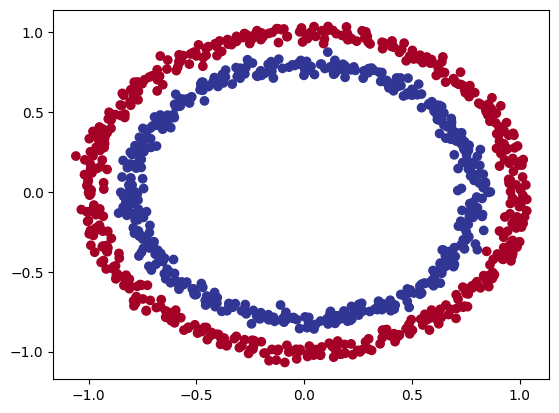

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 855us/step
doing binary classifcation...


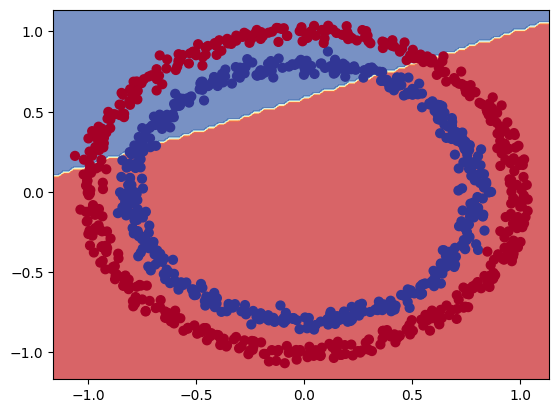

In [24]:
# Check the decision boundary
plot_decision_boundary(model=model_4, X=X, y=Y)

## Trying to build a model with non-linear function

In [25]:
tf.random.set_seed(42)

In [26]:
# Create model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_5.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.3353 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1834 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9738 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8514 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6325 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4866 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2778 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9991 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.3742 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2881 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4300
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4520
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4630
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4610
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4590
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4570
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4430
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4180
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4350
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4560
Epoch 93/100


313/313 [==============================] - 0s 861us/step
doing binary classifcation...


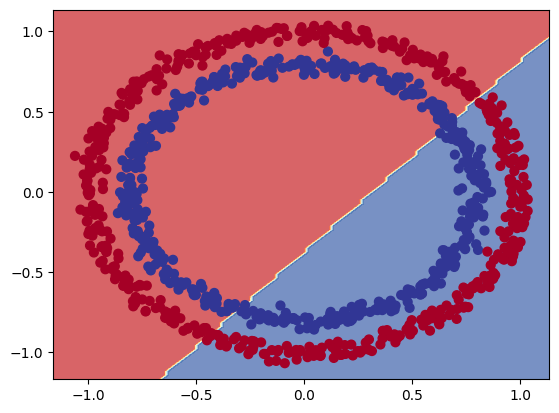

In [27]:
# Check the decision boundary
plot_decision_boundary(model=model_5, X=X, y=Y)

In [28]:
tf.random.set_seed(42)

# Create model with non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/100


In [29]:
model_6.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 944us/step
doing binary classifcation...


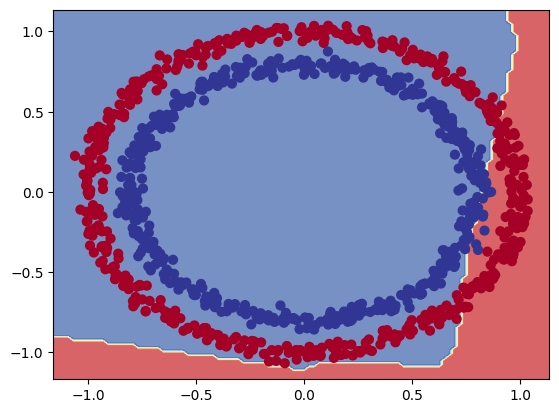

In [30]:
# Check the decision boundary
plot_decision_boundary(model=model_6, X=X, y=Y)

In [31]:
tf.random.set_seed(42)

In [32]:
# Create model with non-linear activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_7.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, Y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.7076 - accuracy: 0.4950
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.5120
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5190
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5280
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5300
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5390
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5320
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5360
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5350
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5470
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.9110
Epoch 84/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.9170
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.9200
Epoch 86/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.9260
Epoch 87/250
32/32 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.9240
Epoch 88/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.9220
Epoch 89/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.9240
Epoch 90/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.9260
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.9310
Epoch 92/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.9350
Epoch 93/250


32/32 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.9900
Epoch 165/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.9900
Epoch 166/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1420 - accuracy: 0.9900
Epoch 167/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1399 - accuracy: 0.9900
Epoch 168/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1390 - accuracy: 0.9900
Epoch 169/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1368 - accuracy: 0.9890
Epoch 170/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.9900
Epoch 171/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9900
Epoch 172/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.9910
Epoch 173/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.9900
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9910
Epoch 246/250
32/32 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9920
Epoch 247/250
32/32 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9920
Epoch 248/250
32/32 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9920
Epoch 249/250
32/32 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9910
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9920


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


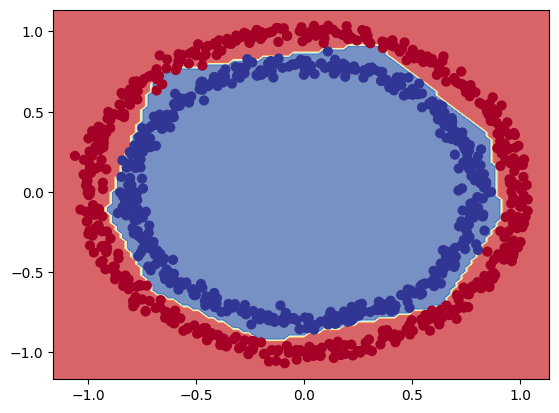

In [33]:
# Check the decision boundary
plot_decision_boundary(model=model_7, X=X, y=Y)

## Exploring even more non linearity

In [34]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

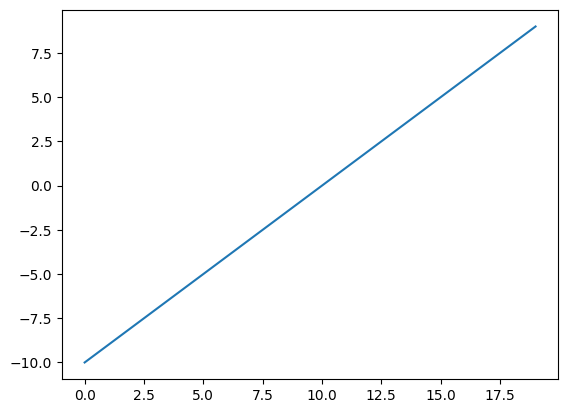

In [35]:
# Visualize the toy tensor
plt.plot(A)

In [36]:
# Replicating sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [37]:
# Use the sigmoid function on A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

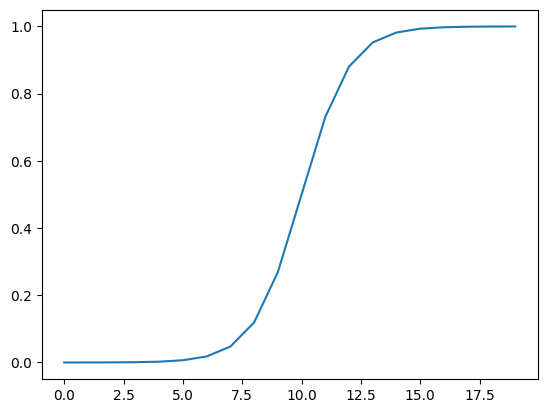

In [38]:
# Plot A transformed by sigmoid
plt.plot(sigmoid(A))

In [39]:
# Replicating ReLu
def relu(x):
    return tf.maximum(0, x)

In [40]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

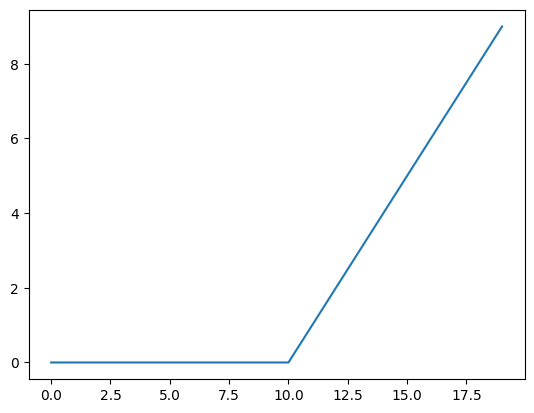

In [41]:
# Plot A transformed by ReLu
plt.plot(relu(A))

In [42]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

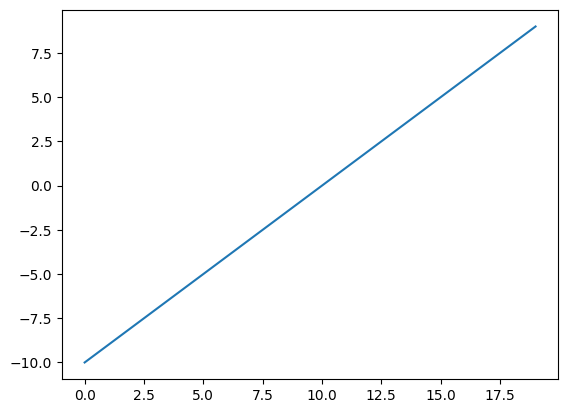

In [43]:
plt.plot(tf.keras.activations.linear(A))

In [44]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evalutation and Improvement

In [45]:
# We need to create a train and test set
len(X)

1000

In [46]:
X_train, Y_train = X[:800], Y[:800]
X_test, Y_test = X[800:], Y[800:]
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [48]:
# Let's recreate a model to fit on training data
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

history = model_8.fit(X_train, Y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.7106 - accuracy: 0.4800
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4462
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5025
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5200
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5350
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5238
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5550
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.5875
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6237
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6600
Epoch 11/25
25/25 [

In [49]:
model_8.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 0s/step - loss: 0.1623 - accuracy: 0.9900


[0.1623300164937973, 0.9900000095367432]

313/313 [==============================] - 0s 980us/step
doing binary classifcation...
313/313 [==============================] - 0s 895us/step
doing binary classifcation...


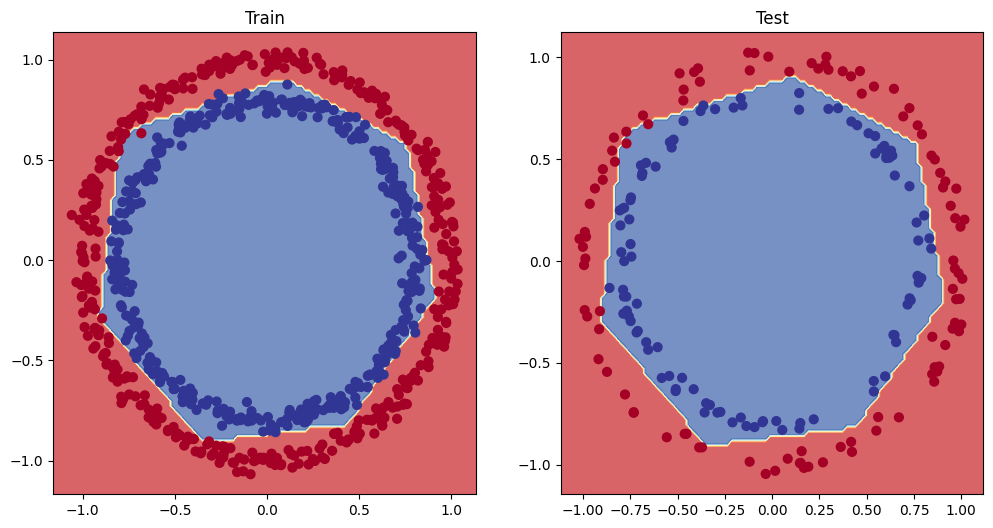

In [50]:
# Plot decision boundary for train set and test set
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=Y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=Y_test)
plt.show()

## Plot loss (or training) curves

In [51]:
history.history

{'loss': [0.7106268405914307,
  0.6938539743423462,
  0.6894788146018982,
  0.6870662569999695,
  0.6846163868904114,
  0.6807104349136353,
  0.6739124059677124,
  0.6581027507781982,
  0.6336692571640015,
  0.6123416423797607,
  0.5808218121528625,
  0.5545578598976135,
  0.5351917743682861,
  0.5084156394004822,
  0.4909805655479431,
  0.45852670073509216,
  0.4334951639175415,
  0.4178573489189148,
  0.3985788822174072,
  0.3820021450519562,
  0.3606072962284088,
  0.34977924823760986,
  0.3251258134841919,
  0.3081713914871216,
  0.22803369164466858],
 'accuracy': [0.47999998927116394,
  0.44624999165534973,
  0.5024999976158142,
  0.5199999809265137,
  0.5350000262260437,
  0.5237500071525574,
  0.5550000071525574,
  0.5874999761581421,
  0.6237499713897705,
  0.6600000262260437,
  0.6875,
  0.731249988079071,
  0.7325000166893005,
  0.7574999928474426,
  0.7749999761581421,
  0.7987499833106995,
  0.8287500143051147,
  0.8237500190734863,
  0.8462499976158142,
  0.857500016689300

In [52]:
# Load history into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.710627,0.48000
1,0.693854,0.44625
2,0.689479,0.50250
3,0.687066,0.52000
4,0.684616,0.53500
5,0.680710,0.52375
6,0.673912,0.55500
7,0.658103,0.58750
8,0.633669,0.62375
9,0.612342,0.66000


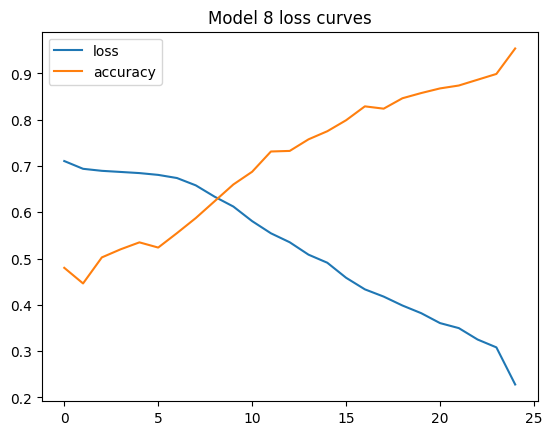

In [53]:
# Plot the curves
pd.DataFrame(history.history).plot()
plt.title('Model 8 loss curves')
plt.show()

## Finding the best learning rate

We need the following steps:
- Learning rate **callback** (extra piece of functionality while the model is trainig)
- Another model (we can use the same, but for practice we will use another)
- A modified loss curves plot

In [54]:
# Set seed
tf.random.set_seed(42)

# Create model 
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_9.compile(loss='binary_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

# Fit the model
history_9 = model_9.fit(X_train, Y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7383 - accuracy: 0.4888 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7374 - accuracy: 0.4888 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7365 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7354 - accuracy: 0.4850 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7343 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7331 - accuracy: 0.4825 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7317 - accuracy: 0.4800 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7305 - accuracy: 0.4787 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4837 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.4762 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.4963 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5013 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.4988 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5138 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7108 - accuracy: 0.5213 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.4963 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7109 - accuracy: 0.5

<Axes: xlabel='epochs'>

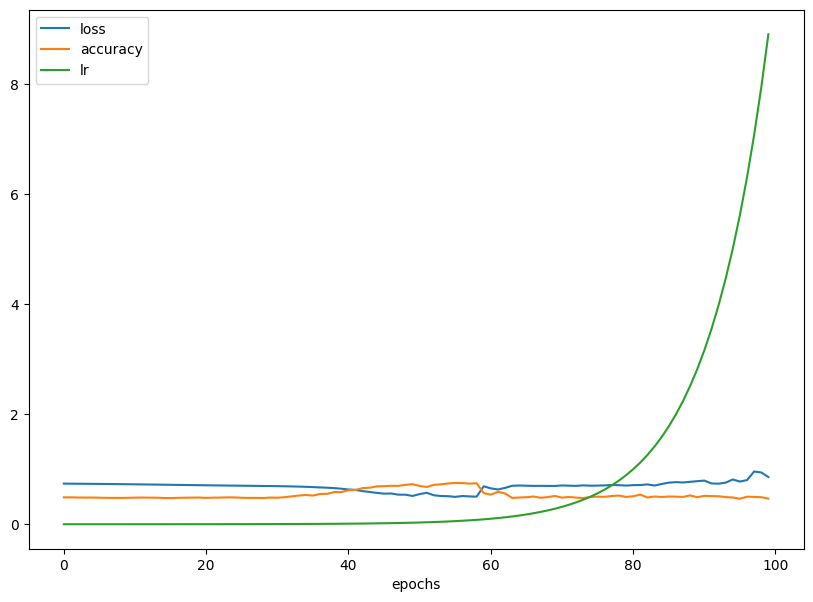

In [55]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

In [56]:
# Plot learning rate vs loss (same function on the callback) with a tf.range(100) as argument to simulate the 100 epochs
lrs = 1e-4 * (10**(tf.range(100) / 20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate vs Loss')

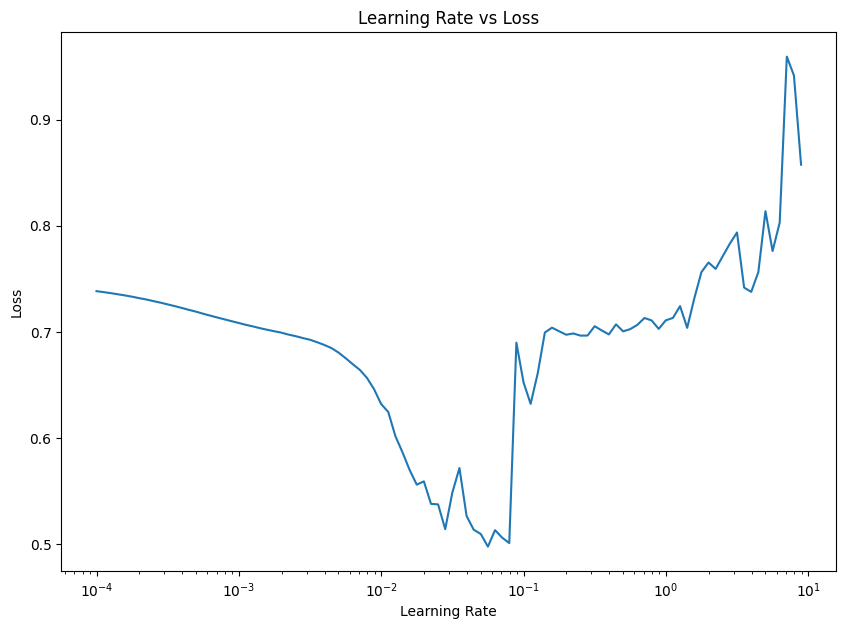

In [57]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')

In [59]:
# Lets try a higher ideal learning rate with the same model (0.02)

# Set seed
tf.random.set_seed(42)

# Create model 
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_10.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=['accuracy'])


# Fit the model
history_10 = model_10.fit(X_train, Y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.5663
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6338
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6712
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.7750
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.8462
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.9275
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.9212
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2242 - accuracy: 0.9538
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9762
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9887
Epoch 11/25
25/25 [

In [60]:
model_10.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9850


[0.05034003406763077, 0.9850000143051147]

In [61]:
model_8.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9900


[0.1623300164937973, 0.9900000095367432]

**Model 8 has a higher accuracy but higher loss function**

313/313 [==============================] - 0s 936us/step
doing binary classifcation...
313/313 [==============================] - 0s 872us/step
doing binary classifcation...


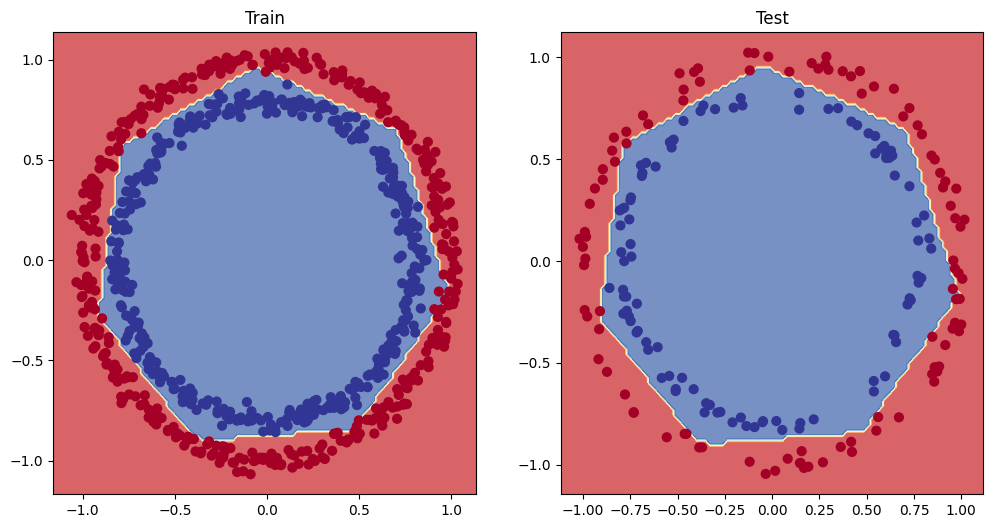

In [62]:
# Plot decision boundary for train set and test set
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=Y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=Y_test)
plt.show()

## More classification methods

In [64]:
# check accuracy
loss, accuracy = model_10.evaluate(X_test, Y_test)
print(f'Model loss on test set: {loss}')
print(f'Model accuracy on test set: {accuracy * 100:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9850
Model loss on test set: 0.05034003406763077
Model accuracy on test set: 98.50%


In [67]:
# Create confusion matrix
Y_preds = model_10.predict(X_test)

# Y_preds comes in prediction probability form, the standard output of the sigmoid (or softmax) activation functions
# We convert the prediction probabilities to binary format using tf.round()

# Confusion matrix
confusion_matrix(Y_test, tf.round(Y_preds))


7/7 [==============================] - 0s 3ms/step


array([[98,  3],
       [ 0, 99]], dtype=int64)

## Making the confusion matrix prettier

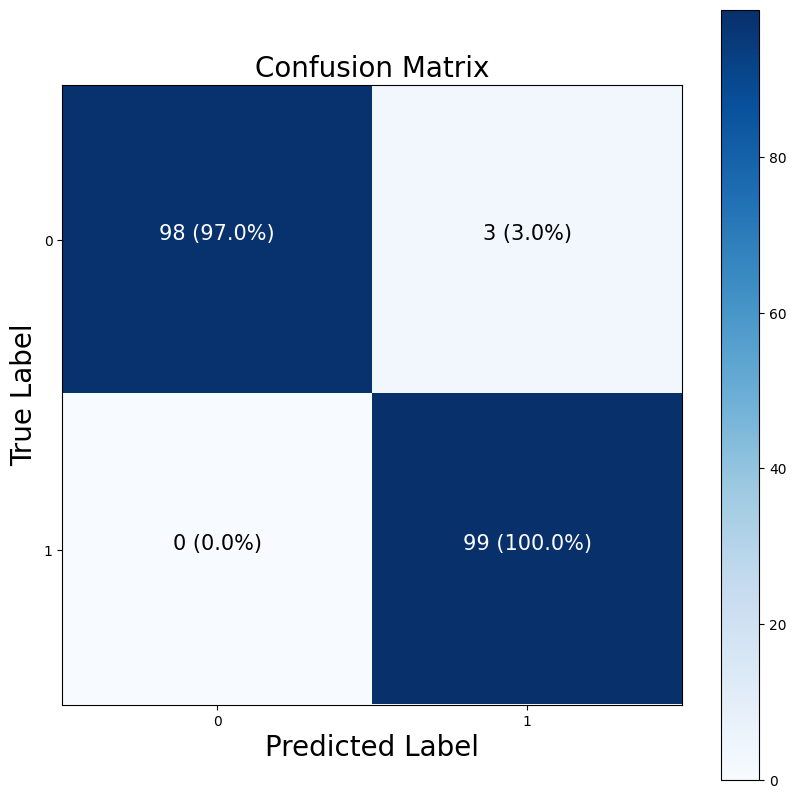

In [72]:
figsize=(10, 10)

# Create confusion matrix
cm = confusion_matrix(Y_test, tf.round(Y_preds))
# Normalize confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix', 
      xlabel='Predicted Label',
      ylabel='True Label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes), 
      xticklabels=labels,
      yticklabels=labels)

# Set x-axis to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()


# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text in each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', horizontalalignment='center', color='white' if cm[i, j] > threshold else 'black', size=15)
    